In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data = read_csv("https://raw.github.com/gageblack/Reproducibility_Demo/master/data.csv")
data = mutate(data, numReads = data$`reads/400`*400, )
data$`reads/400` = NULL
data = rename(data, ID = `best available identification`)
bacteriaData = data %>%
  group_by(ID) %>%
  summarise(reads = sum(numReads))

Parsed with column specification:
cols(
  sample = col_character(),
  `best available identification` = col_character(),
  `reads/400` = col_integer(),
  label = col_character()
)


[1] "Hello"


In [3]:
data_no_reads = data
data_no_reads$numReads = NULL
data_no_reads = distinct(data_no_reads)

mus_no_reads = filter(data_no_reads,label == "BellyButtonsMuseum2") %>%
  group_by(ID) %>%
  summarise(nMus = n())

online_no_reads = filter(data_no_reads,label == "BellyButtonsScienceOnline") %>%
  group_by(ID) %>%
  summarise(nOnl = n())

bacteriaData = left_join(bacteriaData, mus_no_reads, by="ID")
bacteriaData = left_join(bacteriaData, online_no_reads, by="ID")
bacteriaData[is.na(bacteriaData)] <- 0

[1] "Still good"


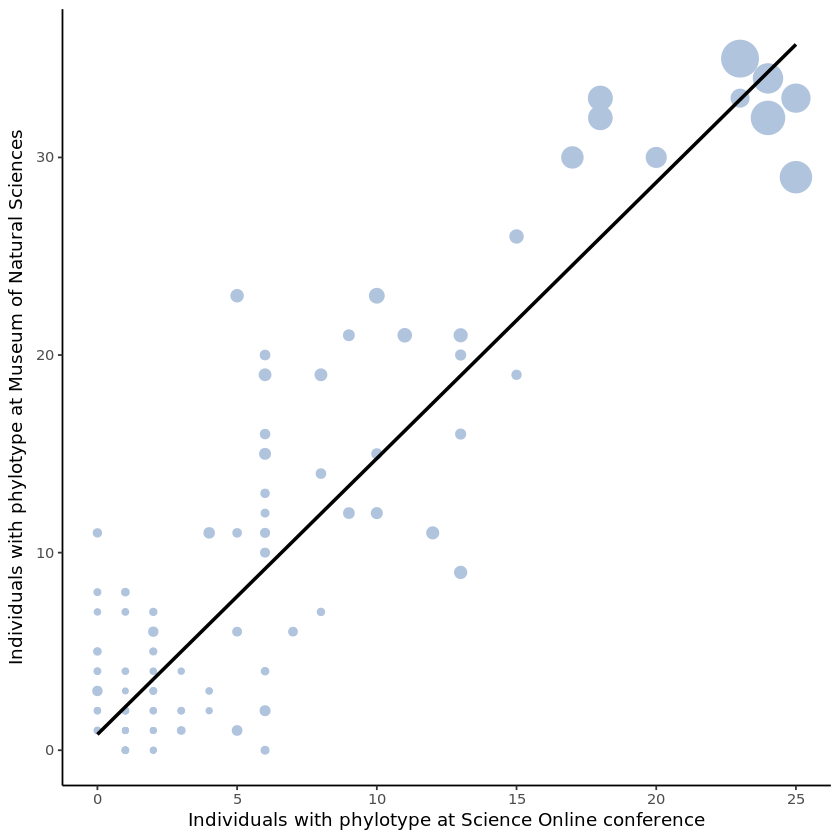

In [4]:
ggplot(bacteriaData, aes(x = nOnl, y = nMus)) +
  geom_point(color = "#B0C4DE", aes(size = reads), show.legend = F) + 
  geom_smooth(method = "lm", se = F, color = "Black") +
  xlab("Individuals with phylotype at Science Online conference") +
  ylab("Individuals with phylotype at Museum of Natural Sciences") +
  scale_size_continuous(range = c(1, 10)) +
  theme_classic()